In [31]:
import numpy as np
import pandas as pd
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [18]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/dataset/archive.zip'
# Directory to extract the contents
extract_dir = '/content/drive/MyDrive/malaria_data/extracted_files/'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted files to: {extract_dir}")


Extracted files to: /content/drive/MyDrive/malaria_data/extracted_files/


In [19]:
# List files in the extracted directory
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)



Extracted files: ['cell_images']


In [21]:
# List files in the 'cell_images' directory
cell_images_dir = os.path.join(extract_dir, 'cell_images')
files_in_cell_images = os.listdir(cell_images_dir)
print("Files in 'cell_images' directory:", files_in_cell_images)


Files in 'cell_images' directory: ['Parasitized', 'Uninfected', 'cell_images']


In [24]:


# Directories for Parasitized and Uninfected images
parasitized_dir = os.path.join(cell_images_dir, 'Parasitized')
uninfected_dir = os.path.join(cell_images_dir, 'Uninfected')

# Initialize empty lists to store image data and labels
x_all = []
y_all = []

# Load and process Parasitized images
for img_name in os.listdir(parasitized_dir):
    img_path = os.path.join(parasitized_dir, img_name)
    img = cv2.imread(img_path)  # Read the image
    if img is not None:
        img = cv2.resize(img, (200, 200))  # Resize to 200x200
        x_all.append(img)
        y_all.append(1)  # Label for Parasitized (infected)

# Load and process Uninfected images
for img_name in os.listdir(uninfected_dir):
    img_path = os.path.join(uninfected_dir, img_name)
    img = cv2.imread(img_path)  # Read the image
    if img is not None:
        img = cv2.resize(img, (200, 200))  # Resize to 200x200
        x_all.append(img)
        y_all.append(0)  # Label for Uninfected

# Convert lists to numpy arrays
x_all = np.array(x_all)
y_all = np.array(y_all)

print(x_all.shape, y_all.shape)  # Check the shapes of the arrays

# Optionally, save the arrays for future use
np.save('x_all_200.npy', x_all)
np.save('y_all_200.npy', y_all)


(27558, 200, 200, 3) (27558,)


Index number: 4367
Label: 1


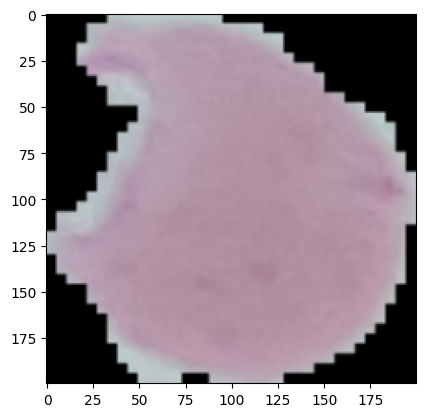

In [25]:
idx = random.randint(0, len(x_all))
print("Index number: {}".format(idx))
print("Label: {}".format(y_all[idx]))
plt.imshow(x_all[idx])

In [26]:
print(x_all.shape, y_all.shape)

(27558, 200, 200, 3) (27558,)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.1, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24802, 200, 200, 3) (2756, 200, 200, 3) (24802,) (2756,)


In [32]:
from tensorflow.keras.utils import to_categorical

# One hot encoded vectors
num_classes = 2

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape, y_test.shape)


(24802, 2) (2756, 2)


In [33]:
# check input
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(24802, 200, 200, 3) (24802, 2) (2756, 200, 200, 3) (2756, 2)


In [34]:
print('Done!')

Done!
